<a href="https://colab.research.google.com/github/heispv/programming-feb2023/blob/master/32_programming_web_scarping_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
URL = "https://coinmarketcap.com/"
page = requests.get(URL)

In [4]:
# Check the response of the get request
print(page)

<Response [200]>


<!DOCTYPE html><html lang="en" dir="ltr"><head><meta charSet="utf-8"/><meta http-equiv="x-ua-compatible" content="ie=edge"/><meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no, shrink-to-fit=no"/><script>(function() {var isInApp = navigator.userAgent.match(/CMCApp/i);if (!isInApp && !window.oneTrustScriptLoad) {window.oneTrustScriptLoad = true;document.write('<scr'+'ipt src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js" type="text/javascript" charset="UTF-8" data-domain-script="13729615-a271-4a5f-8eae-0c058b458464"></sc'+'ript><scr'+'ipt type="text/javascript"> function OptanonWrapper() {} </sc'+'ript>');}
})()</script><script>(function() {if (false) {window.__renderTime__.csrRender = 1704911217261;return;}window.__renderTime__ = {"pageInitStart":1704911217223,"pageInitEnd":1704911217252,"pageRender":1704911217261};window.__renderTime__.pageLoad = Date.now();})()</script><script>(function() {if (!!window.__RESOURCE_ERROR__) re
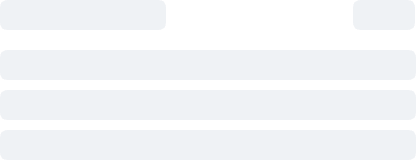

In [5]:
# Check the page.text
print(page.text)

In [6]:
# Parse the HTML code to BeautifulSoup function
soup = BeautifulSoup(page.content, 'html.parser')

<!DOCTYPE html>
<html dir="ltr" lang="en"><head><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no, shrink-to-fit=no" name="viewport"/><script>(function() {var isInApp = navigator.userAgent.match(/CMCApp/i);if (!isInApp && !window.oneTrustScriptLoad) {window.oneTrustScriptLoad = true;document.write('<scr'+'ipt src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js" type="text/javascript" charset="UTF-8" data-domain-script="13729615-a271-4a5f-8eae-0c058b458464"></sc'+'ript><scr'+'ipt type="text/javascript"> function OptanonWrapper() {} </sc'+'ript>');}
})()</script><script>(function() {if (false) {window.__renderTime__.csrRender = 1704911217261;return;}window.__renderTime__ = {"pageInitStart":1704911217223,"pageInitEnd":1704911217252,"pageRender":1704911217261};window.__renderTime__.pageLoad = Date.now();})()</script><script>(function() {if (!!window.__RESOURCE_ERROR__) r
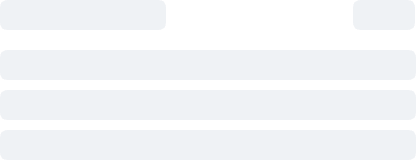

In [7]:
print(soup)

In [8]:
# Check the soup type
type(soup)

bs4.BeautifulSoup

In [9]:
# Check the page.text type
type(page.text)

str

* Havasemoon bashe ke ba inke zamani ke `soup` ro print mikonim va zamani ke `page.text` ro print mikonim ye chiz moshabeh migirm, ama dar vaghe in do to datatype mokhtalef hastan.

In [10]:
results = soup.find(id="__next")

<div data-reactroot="" id="__next">
 <div class="sc-f70bb44c-0 iQEJet">
 </div>
 <div class="sc-3bdf3e32-1 kiDqTy global-layout-v2">
  <div class="main-content">
   <div class="sc-3bdf3e32-0 cPeubT">
    <div class="sc-f70bb44c-0 bmCqYO">
     <div class="sc-f70bb44c-0 iQEJet inner-banner">
      <div class="sc-f70bb44c-0 fBxJEx">
      </div>
     </div>
    </div>
    <div class="sc-210db227-0 jRTFvI" data-role="global-header">
     <div>
      <div class="sc-9102b084-0 pzQCH cmc-header-desktop">
       <div class="sc-57ed43ab-0 fgFqBM header-wrapper topbar">
        <div class="sc-f70bb44c-0 gkqobH" data-role="global-container">
         <div class="sc-57ed43ab-1 dysfqt global-stats">
          <div class="sc-f70bb44c-0 joWCPb glo-stat-item">
           <span class="sc-f70bb44c-0 jNqpFI base-text">
            Cryptos
            <!-- -->
            :
           </span>
           <a class="sc-f70bb44c-0 iQEJet cmc-link" href="/">
            2M+
           </a>
          </div>
  
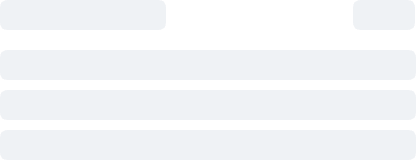

In [11]:
print(results.prettify())

biaim va baham bebinim ke chjuri mitoonim yek container ro az dakhele code e HTML emoon estekhraj konim. ba tavajoh be inke midoonim che etelaati mikhaim, miaim va `tag` va `calss name` e oon container emoon ro moshakhas mikonim.

In [27]:
coins_details = results.find_all("div", class_="sc-aef7b723-0 sc-adbfcfff-1 klolJt")

Hala check konim yeki az object hamoon ro ke aya tebghe oon chizi ke madde nazaremooon bood, hast ya na.

In [33]:
coins_details[0]

<div class="sc-aef7b723-0 sc-adbfcfff-1 klolJt"><div class="sc-aef7b723-0 sc-adbfcfff-2 iOUohe hide-ranking-number"><p class="sc-4984dd93-0 kKpPOn" color="text" data-sensors-click="true" font-size="1" font-weight="semibold">Bitcoin</p><div class="sc-adbfcfff-3 dDrhas" data-nosnippet="true"><p class="sc-4984dd93-0 iqdbQL coin-item-symbol" color="text3" data-sensors-click="true" font-size="1">BTC</p></div></div></div>

Hala tooye list e `coins_details` micharkhim va doone doone coin_name va coin_short_name ro ba tavajoh be `tag` va `class name` esh estekhraj mikonim va tooye variable ha mirizim.

In [28]:
for coin_detail in coins_details:
    coin_name = coin_detail.find("p", class_="sc-4984dd93-0 kKpPOn")
    coin_short_name = coin_detail.find("p", class_="sc-4984dd93-0 iqdbQL coin-item-symbol")

    print(f"Coin name: {coin_name}\nCoin short name: {coin_short_name}\n\n")

Coin name: <p class="sc-4984dd93-0 kKpPOn" color="text" data-sensors-click="true" font-size="1" font-weight="semibold">Bitcoin</p>
Coin short name: <p class="sc-4984dd93-0 iqdbQL coin-item-symbol" color="text3" data-sensors-click="true" font-size="1">BTC</p>


Coin name: <p class="sc-4984dd93-0 kKpPOn" color="text" data-sensors-click="true" font-size="1" font-weight="semibold">Ethereum</p>
Coin short name: <p class="sc-4984dd93-0 iqdbQL coin-item-symbol" color="text3" data-sensors-click="true" font-size="1">ETH</p>


Coin name: <p class="sc-4984dd93-0 kKpPOn" color="text" data-sensors-click="true" font-size="1" font-weight="semibold">Tether USDt</p>
Coin short name: <p class="sc-4984dd93-0 iqdbQL coin-item-symbol" color="text3" data-sensors-click="true" font-size="1">USDT</p>


Coin name: <p class="sc-4984dd93-0 kKpPOn" color="text" data-sensors-click="true" font-size="1" font-weight="semibold">BNB</p>
Coin short name: <p class="sc-4984dd93-0 iqdbQL coin-item-symbol" color="text3" data

Faghat baraye ma text mohem hast, va baghieie chizhayi ke print mishe ro lazem nadarim, pas bejaye `coin_name` mitoonim az `coin_name.text` estefade konim, baraye coin_short_name ham hamintor.

In [37]:
example = coins_details[0].find("p", class_="sc-4984dd93-0 kKpPOn")

In [38]:
type(example)

bs4.element.Tag

In [34]:
for coin_detail in coins_details:
    coin_name = coin_detail.find("p", class_="sc-4984dd93-0 kKpPOn")
    coin_short_name = coin_detail.find("p", class_="sc-4984dd93-0 iqdbQL coin-item-symbol")

    print(f"Coin name: {coin_name.text}\nCoin short name: {coin_short_name.text}\n\n")

Coin name: Bitcoin
Coin short name: BTC


Coin name: Ethereum
Coin short name: ETH


Coin name: Tether USDt
Coin short name: USDT


Coin name: BNB
Coin short name: BNB


Coin name: Solana
Coin short name: SOL


Coin name: XRP
Coin short name: XRP


Coin name: USDC
Coin short name: USDC


Coin name: Cardano
Coin short name: ADA


Coin name: Avalanche
Coin short name: AVAX


Coin name: Dogecoin
Coin short name: DOGE




**Next Session's assignment**

1. Link pain ro dobare murur konin (optional): https://realpython.com/beautiful-soup-web-scraper-python/

2. https://coinmarketcap.com/rankings/exchanges/
Baraye man `Exchange name` va `Score` ro estekhraj konin va mesle mesale bala print konin.